![corina-rainer-9FDI-_E29fk-unsplash.jpg](./images/corina-rainer-9FDI-_E29fk-unsplash.jpg)

# Movie Industry Analysis for Microsoft
## Author: Fred Mutuma

## Overview

I have been tasked with assisting Microsoft in their venture into the movie industry. My goal was exploring what types of films are currently doing the best at the box office and to provide these findings to Microsoft's new movie studio executives. My analysis of the movie industry, achieved by garnering data and utilizing descriptive statistics and visualizations, has shown that a larger budget is correlated with a higher worldwide box office gross. By allocating 100 million to 250 million dollars to produce a movie released in June or November, or December the analysed data shows that a movie studio will be extremely likely to succeed. I have also given recommendations as to which studios to benchmark from and learn a thing or two from them. Most importantly their production process.  Microsoft can use this report to target their production budget, genre, release-time, and other great studios for collaboration in their upcoming movie endeavors to generate the highest amount of revenue possible. 

## Business Problem

I have been informed that Microsoft want to dip their toes in the movie-making industry, and have tasked me with providing an analysis to be used for this business. They need the necessary knowledge to move forward. To assist them with this goal, I have been looking at the movies that grossed highest in worldwide box office amounts for the years between 2016 to 2019. By analyzing the movies that have been most successful recently, I can make recommendations about attributes that Microsoft's movies should have in order to achieve the highest revenue. I have based my analysis on four main factors:
* Movie Genre: What types of movie content are currently most successful?
* Time of Release: When is the most profitable time of year to release a movie?
* Production Budget: What budget amount tends to achieve the highest box office gross?
* Additional Recommendations: What else do top-grossing movies have in common from the analysed data?

From the data I was working with the timeframe I chose made more sense keeping in mind the fast changing dynamics in the movie industry and the world at large. The data I used unfortunately did not have data for the last two years 2020 and 2021 which would be imperative in this analysis. Therfore this analysis will serve as an analysis for the most recent years (last 6 years).

## Data Understanding

I utilized four different data sources for my analysis. In order to have the most comprehensive view of the industry as it currently is, I limited all my data to the years 2016 to 2019. 
* imdb.title.basics.csv.gz: this is a dataset from imdb site with basic information of top movies with ther runtimes, genre and year of release. 
* title.ratings.csv: This dataset contains ratings from the movies mentioned in the basics dataset above.
* tn.movie_budgets.csv: This dataset contains the production budgets for top grossing movies of all time. I used it to compare and analyse budget needed to produce a top grossing box office movie.
* bom.movie_gross.csv: This dataset contains domestic and worldwide gross of movies from 2010 onwards to 2019. I oly used the data of movies from 2016 to 2019 to ensure I used the most recent data.

In [1]:
#Begin the project by importing the packages necessary for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Data

In [2]:
#imported the first dataset, conveted it into a dataframe and named it df.
df = pd.read_csv('./data/imdb.title.basics.csv.gz')
#Explore the dataframe view columns names and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [3]:
#view the dataframe itself
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
#imported the second dataset, conveted it into a dataframe and named it df1.
df1 = pd.read_csv('./data/title.ratings.csv')
#Explore the dataframe view columns names and data types.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
#view the dataframe itself
df1.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
#imported the third dataset conveted it into a dataframe and named it df2.
df2 = pd.read_csv('./data/tn.movie_budgets.csv')
#Explore the dataframe view columns names and data types.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
#view the dataframe itself
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
#imported the fourth dataset conveted it into a dataframe and named it df3.
df3 = pd.read_csv('./data/bom.movie_gross.csv')
#Explore the dataframe view columns names and data types.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
#view the dataframe itself
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


After importing all the datasets seccessfully, next is to clean the data in preparation for visualisation and further analysis.

## Cleaning the Data
I will clean the data first by dropping null values then dropping unnecessary columns and rows and finaly joining dataframes where necessarry. I will document all operations.

### First dataframe DF

In [10]:
#drop all NaN values fron the dataframe df.
df.dropna(axis=0, how='any', inplace=True)
#the number of rows will reduce from 146144.
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [11]:
#drop one title column and the runtime_minutes
df.drop(['primary_title','runtime_minutes'], axis=1, inplace=True)
df.head()

,tconst,original_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
4,tt0100275,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,Comedy


### Second dataframe DF1

In [12]:
#drop the numvotes column as I will not use it.
df1.drop('numvotes', axis=1, inplace=True)
df1.head()

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


In [13]:
#Check for NaN values
df1.isna().count()

tconst           73856
averagerating    73856
dtype: int64

There were no NaN values to drop in df1.

### Third dataframe DF2

In [14]:
#Check for NaN values
df2.isna().count()

id                   5782
release_date         5782
movie                5782
production_budget    5782
domestic_gross       5782
worldwide_gross      5782
dtype: int64

In [15]:
#drop the domestic gross column as I will use the worldwide gross
df2.drop('domestic_gross', axis=1, inplace=True)
df2.head()

,id,release_date,movie,production_budget,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"


In [16]:
#Change the 'production_budget' &'worldwide_gross' columns data type to integers.
df2['production_budget'] = df2['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
df2['worldwide_gross'] = df2['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)
df2.head()

/tmp/ipykernel_45632/2529698657.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['production_budget'] = df2['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
/tmp/ipykernel_45632/2529698657.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['worldwide_gross'] = df2['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)


,id,release_date,movie,production_budget,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


### Fourth dataframe DF3

In [17]:
#Check for NaN values
df3.isna().count()

title             3387
studio            3387
domestic_gross    3387
foreign_gross     3387
year              3387
dtype: int64

In [18]:
#drop all rows with NaN values in df3.
df3.dropna(axis=0, how='any', inplace=True)
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [19]:
#Filter the ratings years to the last 5 years.
df3 = df3[df3['year'] >= 2016]
df3.head()

,title,studio,domestic_gross,foreign_gross,year
2322,Captain America: Civil War,BV,408100000.0,745200000,2016
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2324,Finding Dory,BV,486300000.0,542300000,2016
2325,Zootopia,BV,341300000.0,682500000,2016
2326,The Jungle Book (2016),BV,364000000.0,602500000,2016


## More Data Cleaning

In [20]:
#I combined df and df1 as they share the same column 'tconst' which acts as an id.
df = pd.merge(df, df1, on='tconst')
df.head()

,tconst,original_title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0100275,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5
4,tt0137204,Joe Finds Grace,2017,"Adventure,Animation,Comedy",8.1


In [21]:
#dropping 'tconst' column from df that will no be used.
df.drop('tconst', axis = 1, inplace =  True)
df.head()

,original_title,start_year,genres,averagerating
0,Sunghursh,2013,"Action,Crime,Drama",7.0
1,Ashad Ka Ek Din,2019,"Biography,Drama",7.2
2,The Other Side of the Wind,2018,Drama,6.9
3,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5
4,Joe Finds Grace,2017,"Adventure,Animation,Comedy",8.1


In [22]:
#Filter the dataframe to contain records with an average rating of 9.0 and above.
df = df[df['averagerating'] >= 9.0 ]
df.head()

,original_title,start_year,genres,averagerating
77,A Life in the Death of Joe Meek,2013,Documentary,9.1
231,The Last Pogo Jumps Again,2013,"Documentary,Music",9.3
281,Ivan Mosjoukine ou L'enfant du carnaval,2016,Documentary,9.0
535,Sweater,2019,Drama,9.2
538,Chandigarh amritsar chandigarh,2019,"Comedy,Drama,Romance",9.4


In [23]:
#Filter the dataframe to contain records within the last 5 years.
df = df[df['start_year'] >= 2016]
df.head()

,original_title,start_year,genres,averagerating
281,Ivan Mosjoukine ou L'enfant du carnaval,2016,Documentary,9.0
535,Sweater,2019,Drama,9.2
538,Chandigarh amritsar chandigarh,2019,"Comedy,Drama,Romance",9.4
544,Raia 4,2019,Drama,9.2
564,Ragmork,2019,Horror,9.2


## Cleaned Datasets

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 281 to 65710
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  607 non-null    object 
 1   start_year      607 non-null    int64  
 2   genres          607 non-null    object 
 3   averagerating   607 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.7+ KB


In [25]:
df1 = df2
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


In [26]:
df2 = df3
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 2322 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           542 non-null    object 
 1   studio          542 non-null    object 
 2   domestic_gross  542 non-null    float64
 3   foreign_gross   542 non-null    object 
 4   year            542 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 25.4+ KB


Now I have 3 tables with everything I need to start my analysis.
In the case of any data cleaning operation needed onwards, I will
purpose to mention.
* **df**: Contains movies, their genres year of release and their ratings.
* **df1**: Contain movies, production budget and worldwide gross.
* **df2**: Contains movies studios and their gross.
Let's proceed.

## Data Analysis

To fulfill the goal and objectives set at the onset of this project, I performed exploratory analyses on the basis of genre, release time, and budget. For each of these categories, I utilized statistical methods followed by plotting of visualizations to determine the relationship between each of these categories and movie world gross. While their was data for domestic and international gross provided for most movies as well, I used world gross because that is the total amount of money that Microsoft targets to make on a given production.  

One thing I realized as soon as I began my analysis was that my dollar amounts were not very plot-friendly(found out they were of the object data type ). I had to reassess my gross and budget columns at this point and add new columns for budget in millions and world gross in millions. 

In [27]:
#Will be using my df1
#convert the values in millions to a smaller number for effective visualisation.
df1['budget'] = df1['production_budget'] / 1000000

In [28]:
df1['world_gross_millions'] = df1['worldwide_gross']/1000000

In [29]:
df1.describe()

,id,production_budget,worldwide_gross,budget,world_gross_millions
count,5782.000000,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,50.372363,3.158776e+07,9.148746e+07,31.587757,91.487461
std,28.821076,4.181208e+07,1.747200e+08,41.812077,174.719969
min,1.000000,1.100000e+03,0.000000e+00,0.001100,0.000000
25%,25.000000,5.000000e+06,4.125415e+06,5.000000,4.125415
50%,50.000000,1.700000e+07,2.798445e+07,17.000000,27.984448
75%,75.000000,4.000000e+07,9.764584e+07,40.000000,97.645837
max,100.000000,4.250000e+08,2.776345e+09,425.000000,2776.345279


## Genre
### What types of movies receive top ratings?
Exploration the top rated genres.

In [30]:
#Use the count method to get number of movies in each genre.
#Limit them to the to 20 genres.
genre = df['genres'].value_counts().nlargest(10)
genre

Documentary                      279
Drama                             94
Comedy                            24
Comedy,Drama                      17
Documentary,Music                 12
Documentary,Sport                 10
Documentary,History                7
Biography,Documentary,History      6
Drama,Romance                      6
Family                             6
Name: genres, dtype: int64

In [31]:
#Created a dataframe from the above information in order to simplify the plotting process.
data = [['Documentary', 483], ['Drama', 142], ['Comedy', 37], ['Comedy,Drama', 27], ['Documentary,Music', 25],
       ['Documentary,Sport', 24],['Documentary,History', 24], ['Biography,Documentary,History', 22],
       ['Drama,Romance', 21], ['Family', 20]]
dff = pd.DataFrame(data, columns = ['genre', 'count'])
dff

,genre,count
0,Documentary,483
1,Drama,142
2,Comedy,37
3,"Comedy,Drama",27
4,"Documentary,Music",25
5,"Documentary,Sport",24
6,"Documentary,History",24
7,"Biography,Documentary,History",22
8,"Drama,Romance",21
9,Family,20


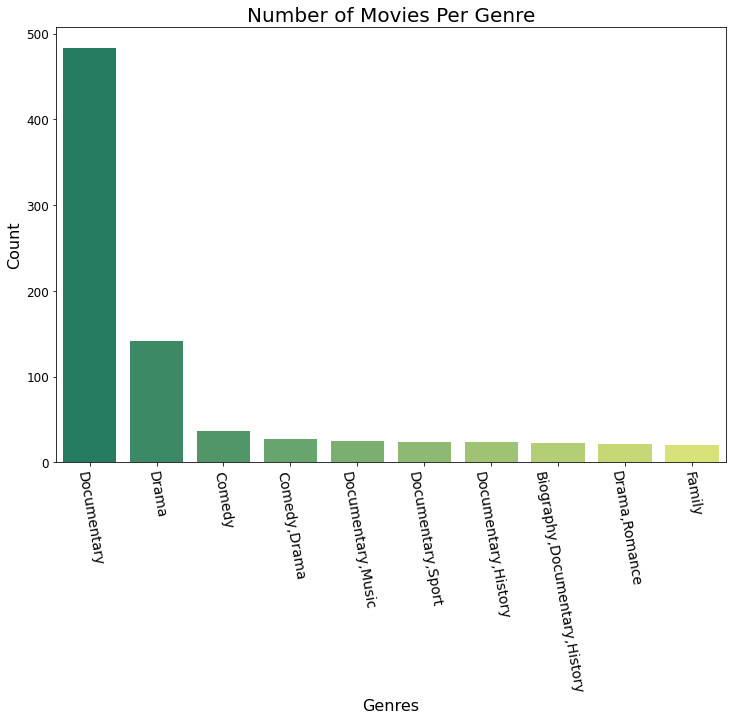

In [32]:
# plotting the top rated genre to visualise the data.
plt.figure(figsize=(12,8))
sns.barplot(x='genre',y='count', data=dff, palette='summer')
plt.title('Number of Movies Per Genre', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genres', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
#saved in images as fig1
plt.savefig('./images/fig1.png')

For the past 5 years the most top rated movies falls under the Documentary, Drama and Comedy genre respectively. Other top genres in this category include Romance, Family, Biography, Music
and Sport. I would recommend making a movie under the top 3 genres as they have a higher chance of drawing a high worldwide gross. Moreover making a combination of a genre with the top three rated genres
may uplift a less popular genre.

More analysis ahead will prove if good ratings translate to more revenue.

## Production Budget Analysis
### What were the top  spending and returns from 2016 - 2019?
I am going to use df1 dataframe. I will perform some data cleaning before proceeding with the analysis and visualisation.

In [33]:
df1.head()

,id,release_date,movie,production_budget,worldwide_gross,budget,world_gross_millions
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,425.0,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,410.6,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,149762350,350.0,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,330.6,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,317.0,1316.721747


In [34]:
#dropped all unnecessary columns.
df1.drop(['production_budget', 'worldwide_gross'], axis = 1, inplace = True)
df1.head()

,id,release_date,movie,budget,world_gross_millions
0,1,"Dec 18, 2009",Avatar,425.0,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,350.0,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747


In [35]:
#Changing the date format
df1['release_date'] = pd.to_datetime(df1.release_date)
#Creating separate columns for release year and month
df1['month'] = df1['release_date'].dt.month
df1['year'] = df1['release_date'].dt.year
df1.head()

,id,release_date,movie,budget,world_gross_millions,month,year
0,1,2009-12-18,Avatar,425.0,2776.345279,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,1045.663875,5,2011
2,3,2019-06-07,Dark Phoenix,350.0,149.762350,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330.6,1403.013963,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,12,2017


### Top 100 grossing movies of all time

In [36]:
#Arrange the movies in descending order from highest grossing
df1_visualisation = df1.sort_values(by='world_gross_millions', ascending = False)
#Filter the movies to the top 100 grossing
df1_visualisation = df1_visualisation.head(100)
df1_visualisation

,id,release_date,movie,budget,world_gross_millions,month,year
0,1,2009-12-18,Avatar,425.0,2776.345279,12,2009
42,43,1997-12-19,Titanic,200.0,2208.208395,12,1997
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,2053.311220,12,2015
6,7,2018-04-27,Avengers: Infinity War,300.0,2048.134200,4,2018
33,34,2015-06-12,Jurassic World,215.0,1648.854864,6,2015
...,...,...,...,...,...,...,...
54,55,2014-05-23,X-Men: Days of Future Past,200.0,747.862775,5,2014
196,97,2012-06-08,Madagascar 3: Europe's Most Wanted,145.0,746.921271,6,2012
99,100,2016-08-05,Suicide Squad,175.0,746.059887,8,2016
52,53,2013-06-21,Monsters University,200.0,743.588329,6,2013


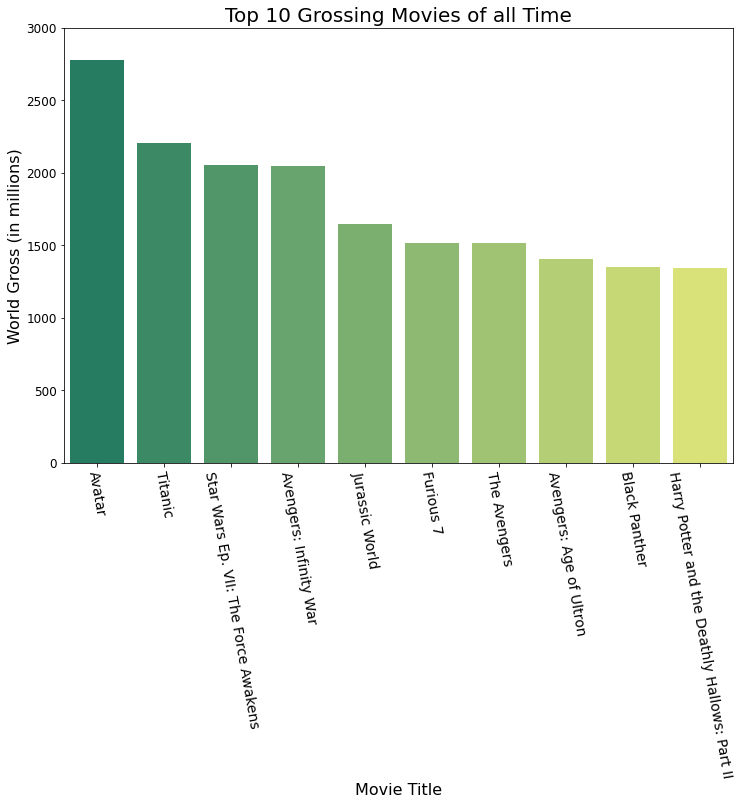

In [37]:
#Filter to top 10 grossing of all time.
#create a plot out of this.
# plotting the top rated genre to visualise the data.
plt.figure(figsize=(12,8))
sns.barplot(x='movie',y='world_gross_millions', data=df1_visualisation.head(10), palette='summer')
plt.title('Top 10 Grossing Movies of all Time', fontsize=20)
plt.ylabel('World Gross (in millions)', fontsize=16)
plt.xlabel('Movie Title', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80)
plt.ylim(0, 3000);
#saved in images as fig2
plt.savefig('./images/fig2.png')

From the visualisation, it is evident that most of the top grossing movies also fall under the top rated genres. However the top grossing is of the genre Fiction.
Therefore there is little relationship between the movie rating and the revenue it generates.

### Top grossing in the past 5 years.
I am going to further filter the dataframe and limit to only to 2016-2019 movies.

In [38]:
#Filter the movies to the the last 5 years.
df1_visualisation = df1_visualisation[df1_visualisation['year'] >= 2016]
#Reset the index
df1_visualisation.reset_index(inplace=True)
df1_visualisation

,index,id,release_date,movie,budget,world_gross_millions,month,year
0,6,7,2018-04-27,Avengers: Infinity War,300.0,2048.134200,4,2018
1,41,42,2018-02-16,Black Panther,200.0,1348.258224,2,2018
2,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,12,2017
3,112,13,2018-06-22,Jurassic World: Fallen Kingdom,170.0,1305.772799,6,2018
4,134,35,2017-03-17,Beauty and the Beast,160.0,1259.199706,3,2017
5,43,44,2018-06-15,Incredibles 2,200.0,1242.520711,6,2018
6,22,23,2017-04-14,The Fate of the Furious,250.0,1234.846267,4,2017
7,135,36,2018-12-21,Aquaman,160.0,1146.894640,12,2018
8,16,17,2016-05-06,Captain America: Civil War,250.0,1140.069413,5,2016
9,95,96,2019-03-08,Captain Marvel,175.0,1123.061550,3,2019


In [39]:
#drop the id and old index column
df1_visualisation.drop(['index'], axis = 1, inplace =  True)
df1_visualisation.head()

/home/dyfrey/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,release_date,movie,budget,world_gross_millions,month,year
0,7,2018-04-27,Avengers: Infinity War,300.0,2048.134200,4,2018
1,42,2018-02-16,Black Panther,200.0,1348.258224,2,2018
2,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,12,2017
3,13,2018-06-22,Jurassic World: Fallen Kingdom,170.0,1305.772799,6,2018
4,35,2017-03-17,Beauty and the Beast,160.0,1259.199706,3,2017


In [40]:
#replace the Mission Impossible movie with an appropriate value.
df1_visualisation['movie'] = df1_visualisation['movie'].replace(['Mission: ImpossibleâFallout'], 'Mission: Impossible Fallout')
df1_visualisation

/tmp/ipykernel_45632/11172099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_visualisation['movie'] = df1_visualisation['movie'].replace(['Mission: ImpossibleâFallout'], 'Mission: Impossible Fallout')


,id,release_date,movie,budget,world_gross_millions,month,year
0,7,2018-04-27,Avengers: Infinity War,300.0,2048.134200,4,2018
1,42,2018-02-16,Black Panther,200.0,1348.258224,2,2018
2,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,12,2017
3,13,2018-06-22,Jurassic World: Fallen Kingdom,170.0,1305.772799,6,2018
4,35,2017-03-17,Beauty and the Beast,160.0,1259.199706,3,2017
5,44,2018-06-15,Incredibles 2,200.0,1242.520711,6,2018
6,23,2017-04-14,The Fate of the Furious,250.0,1234.846267,4,2017
7,36,2018-12-21,Aquaman,160.0,1146.894640,12,2018
8,17,2016-05-06,Captain America: Civil War,250.0,1140.069413,5,2016
9,96,2019-03-08,Captain Marvel,175.0,1123.061550,3,2019


In [41]:
#Creation of a new column called profits.
#This column will contain the difference between the budget and the gross.
df1_visualisation['profits'] = df1_visualisation['world_gross_millions']-df1_visualisation['budget']
df1_visualisation

/tmp/ipykernel_45632/2160978012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_visualisation['profits'] = df1_visualisation['world_gross_millions']-df1_visualisation['budget']


,id,release_date,movie,budget,world_gross_millions,month,year,profits
0,7,2018-04-27,Avengers: Infinity War,300.0,2048.134200,4,2018,1748.134200
1,42,2018-02-16,Black Panther,200.0,1348.258224,2,2018,1148.258224
2,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,12,2017,999.721747
3,13,2018-06-22,Jurassic World: Fallen Kingdom,170.0,1305.772799,6,2018,1135.772799
4,35,2017-03-17,Beauty and the Beast,160.0,1259.199706,3,2017,1099.199706
5,44,2018-06-15,Incredibles 2,200.0,1242.520711,6,2018,1042.520711
6,23,2017-04-14,The Fate of the Furious,250.0,1234.846267,4,2017,984.846267
7,36,2018-12-21,Aquaman,160.0,1146.894640,12,2018,986.894640
8,17,2016-05-06,Captain America: Civil War,250.0,1140.069413,5,2016,890.069413
9,96,2019-03-08,Captain Marvel,175.0,1123.061550,3,2019,948.061550


## Budget  by month  for top grossing movies
I will create a visualisation of the budget used in the production of these movies by their time of release.

### By Month

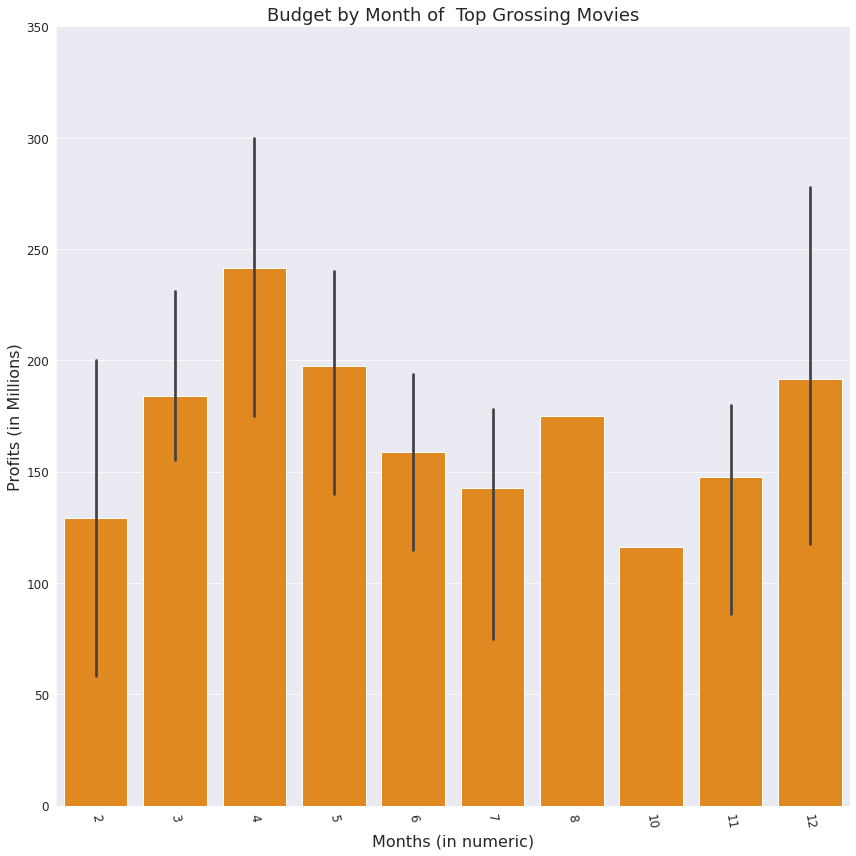

In [42]:
# plotting a bargraph for top grossing movies by month of release.
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
sns.barplot(data=df1_visualisation, x="month", y="budget", color='darkorange',)
plt.title('Budget by Month of  Top Grossing Movies', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Months (in numeric)', fontsize=16)
plt.ylabel('Profits (in Millions)', fontsize=16)
plt.ylim(0, 350)
#saved in images as fig3
plt.tight_layout()
plt.savefig('./images/fig3.png')

I will further analyse the data to draw conclusions from the visualisation above.

### Production Budget: What budget amount tends to achieve the highest box office gross?
I ran the .corr method on df1_visualisation to see if there were any strong correlations in the numerical data. I then generated a heatmap based on these correlations.

In [43]:
# generating correlations
co_relate= df1_visualisation.corr()
co_relate

,id,budget,world_gross_millions,month,year,profits
id,1.000000,-0.235497,-0.373303,0.004090,-0.078011,-0.350939
budget,-0.235497,1.000000,0.508091,-0.104912,-0.028207,0.295544
world_gross_millions,-0.373303,0.508091,1.000000,-0.222435,0.336142,0.972991
month,0.004090,-0.104912,-0.222435,1.000000,0.014365,-0.218600
year,-0.078011,-0.028207,0.336142,0.014365,1.000000,0.380398
profits,-0.350939,0.295544,0.972991,-0.218600,0.380398,1.000000


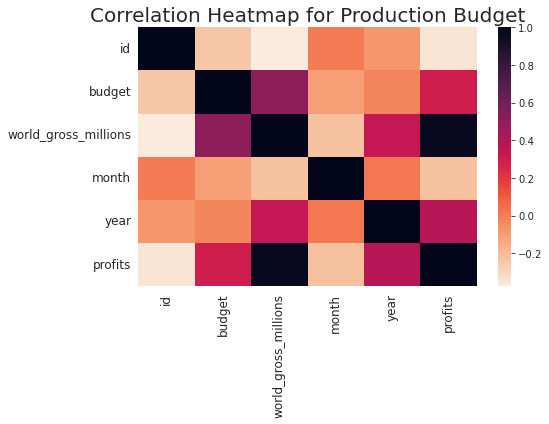

In [44]:
# plotting heatmap of correlations
plt.figure(figsize=(8,6))
plt.title("Correlation Heatmap for Production Budget", fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.heatmap(co_relate, cmap='rocket_r');
#saved in images as fig4
plt.tight_layout()
plt.savefig('./images/fig4.png')

The heatmap shows darker colors where two values are highly correlated and lighter colors where there is less of a correlation. From both the correlation method and the heatmap, there was a strong correlation between budget and world gross, as well as a fair correlation between budget and profits. 


While the correlation between month and anything different was negative which I ignored. The months values are stored as integers. From this visualization, I could conclude that, generally speaking, the more money you put into a movie, the more money you are likely to make from it.

## Top Grossing Movies Analysis by Year
### What were the top  grossing movies from 2016 - 2019?

### 2016
A bargraph showing top grossing movies in 2016.

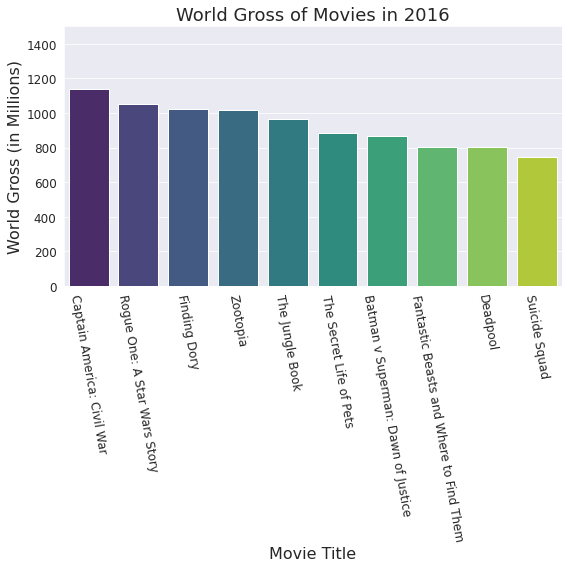

In [45]:
# plotting top grossing movies in 2016
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.barplot(data=df1_visualisation[df1_visualisation['year'] == 2016], x="movie", y="world_gross_millions", palette='viridis')
plt.title('World Gross of Movies in 2016', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('World Gross (in Millions)', fontsize=16)
plt.ylim(0, 1500)
#saved in images as fig5
plt.tight_layout()
plt.savefig('./images/fig5.png')

The top grossing movies in 2016 were all in the Fiction, Adventure, Animation and Superhero movies.

### 2017
A bargraph showing top grossing movies in 2017.

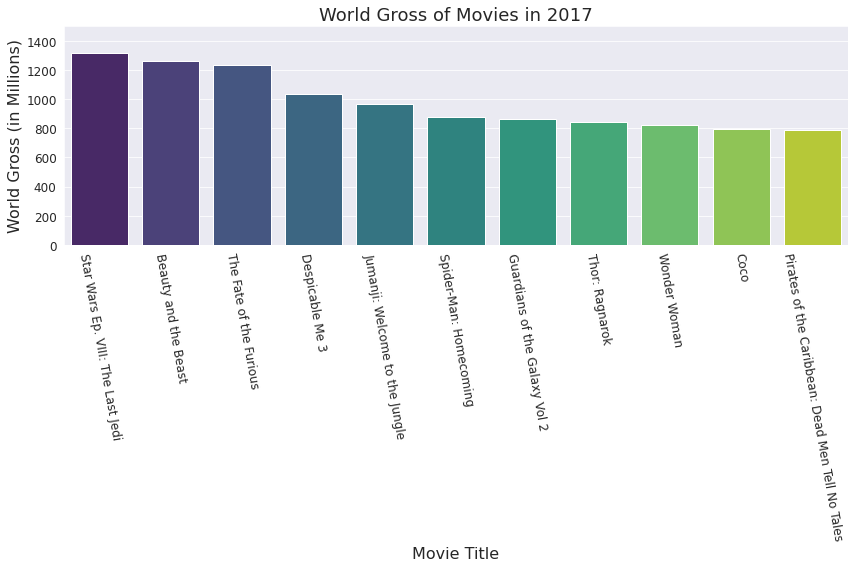

In [46]:
# plotting the relationship between  top grossing movies in 2017
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(data=df1_visualisation[df1_visualisation['year'] == 2017], x="movie", y="world_gross_millions", palette='viridis')
plt.title('World Gross of Movies in 2017', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('World Gross (in Millions)', fontsize=16)
plt.ylim(0, 1500)
#saved in images as fig6
plt.tight_layout()
plt.savefig('./images/fig6.png')

The top grossing movies in 2016 were all in the Fiction, Adventure, Animation and Superhero movies. This is similar to 2016.

### 2018
A bargraph showing top grossing movies in 2018.

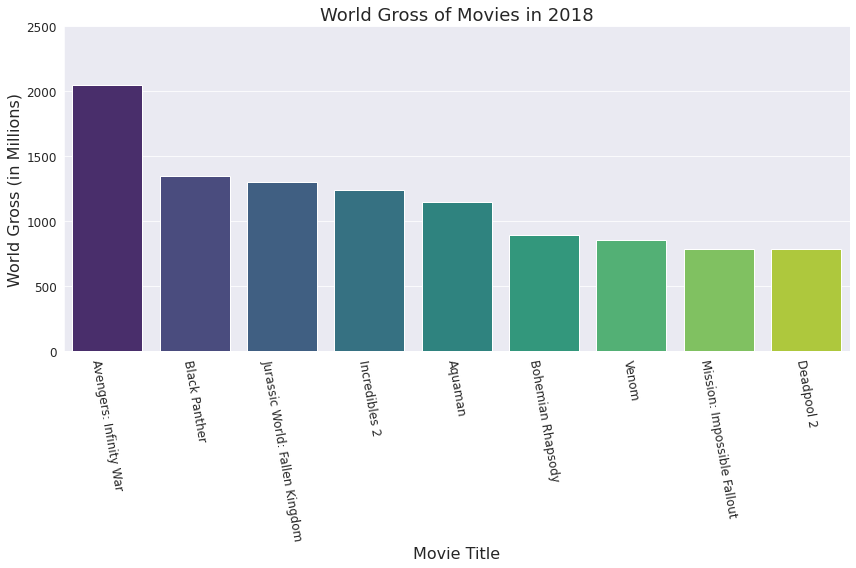

In [47]:
# plotting a bargraph for top grossing movies in 2018
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(data=df1_visualisation[df1_visualisation['year'] == 2018], x="movie", y="world_gross_millions", palette='viridis')
plt.title('World Gross of Movies in 2018', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('World Gross (in Millions)', fontsize=16)
plt.ylim(0, 2500)
#saved in images as fig7
plt.tight_layout()
plt.savefig('./images/fig7.png')

The top grossing movies in 2016 were all in the Fiction, Adventure, Animation and Superhero movies. This is similar to 2017. This shows that there is aconstant trend among top grossing movies.

### 2019
There is only one movie in this year listed. Plotting will not be necessary.

In [48]:
df_2019 =df1_visualisation[df1_visualisation['year'] == 2019]
df_2019

,id,release_date,movie,budget,world_gross_millions,month,year,profits
9,96,2019-03-08,Captain Marvel,175.0,1123.06155,3,2019,948.06155


### Compare the top grossing movies for years 2016-2019

A bargraph to compare the number 1 grossing movies for the years 2016-2019. I decided to have a dataframe  with the required data them plot a bargraph from the data in the new dataframe.


In [49]:
#A new dataframe called top with number 1 grossing movies in years 2016-2019
top = df1_visualisation[(df1_visualisation['movie'].isin(['Captain America: Civil War','Star Wars Ep. VIII: The Last Jedi', 'Avengers: Infinity War', 'Captain Marvel' ]))]
top

,id,release_date,movie,budget,world_gross_millions,month,year,profits
0,7,2018-04-27,Avengers: Infinity War,300.0,2048.134200,4,2018,1748.134200
2,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,12,2017,999.721747
8,17,2016-05-06,Captain America: Civil War,250.0,1140.069413,5,2016,890.069413
9,96,2019-03-08,Captain Marvel,175.0,1123.061550,3,2019,948.061550


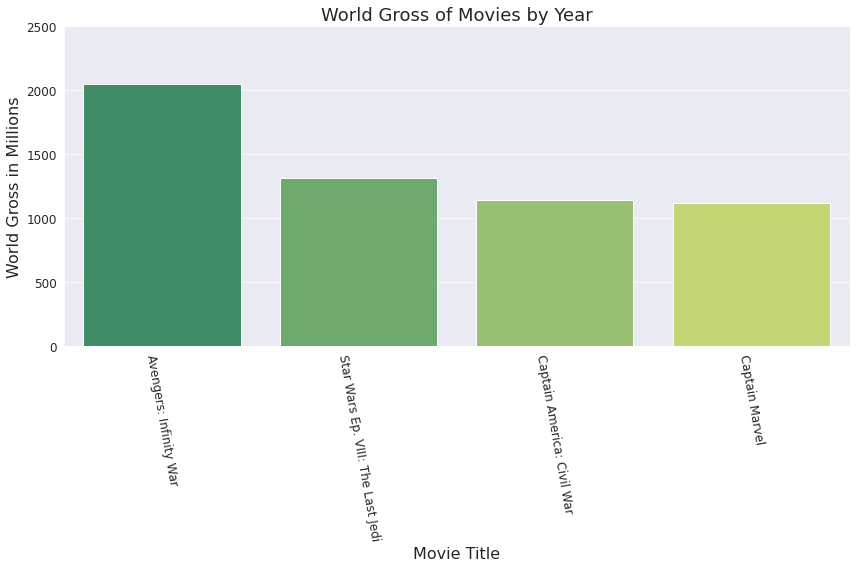

In [50]:
# plotting a bargraph for number 1 grossing movies for each year from 2016-2019
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(data=top, x="movie", y="world_gross_millions", palette='summer')
plt.title('World Gross of Movies by Year', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('World Gross in Millions', fontsize=16)
plt.ylim(0, 2500)
#saved in images as fig8
plt.tight_layout()
plt.savefig('./images/fig8.png')

The top grossing movies for each of the analysed year is of the Fiction-Action genre. There is a trend noted and thus the recommended genre for a top grossing movie is Fiction. Action, Adventure, Animation and Drama follow closely. This observation is
derived from searching the genres found in this filtered dataset.

### Geting an analysis of release time in months of the top grossing movies.

In [51]:
#get number of movies produced each month.
month = df1_visualisation['month'].value_counts()
#make a list of the months and their respective counts
month = [6, 12, 3, 5, 11, 4, 7, 2, 10, 8]
count = [5, 4, 4, 4, 4, 3, 3, 2, 1, 1]
#convert the lists to a dataframe
months = pd.DataFrame(list(zip(month, count)),columns =['month', 'count'])
months

,month,count
0,6,5
1,12,4
2,3,4
3,5,4
4,11,4
5,4,3
6,7,3
7,2,2
8,10,1
9,8,1


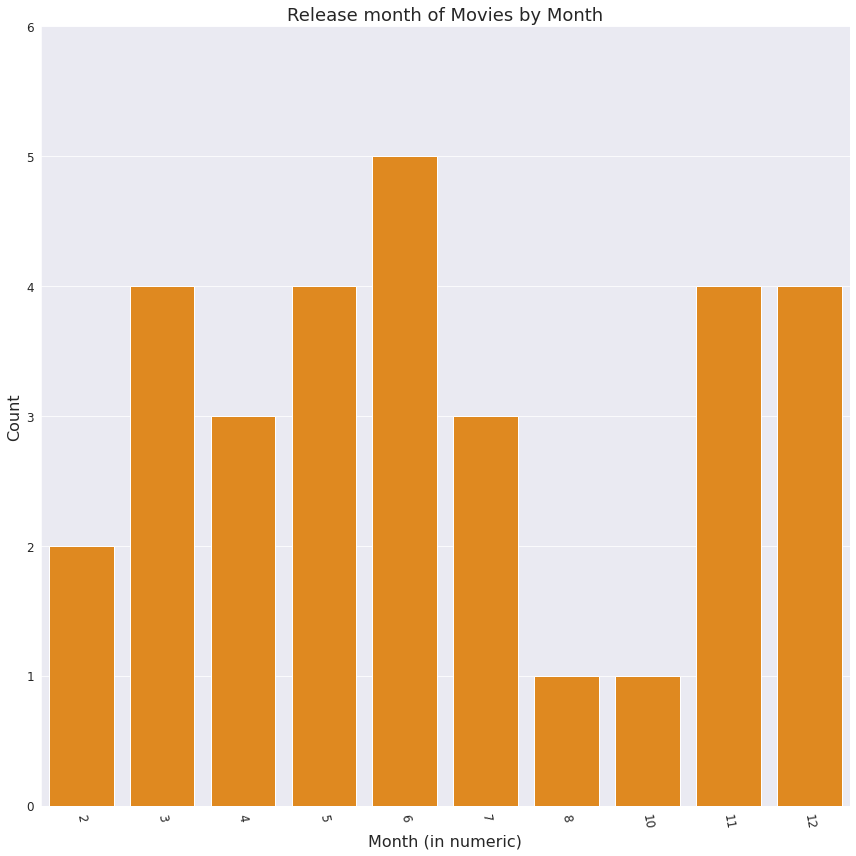

In [52]:
#create a visualisation of the above dataframe
# plotting a bargraph for release date by month
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
sns.barplot(data=months, x="month", y="count", color='darkorange',)
plt.title('Release month of Movies by Month', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Month (in numeric)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.ylim(0, 6)
#saved in images as fig9
plt.tight_layout()
plt.savefig('./images/fig9.png')

From the above graph it is best to conclude that the best month of production is June. The analysis above when combined with the budget by month makes June suitable as one is likely to spend less and get more.
April and December are the next best 2 months to release a movie but in this case, the more you spend the higher the gross revenue.


## Getting a visualisation of top grossing and profits by recent years and months.

First I will create a visualisation of top grossing by years 2016-2019. Then proceed to grouping them by the month of release.


### Profits visualisation by year of release for years 2016-2019.

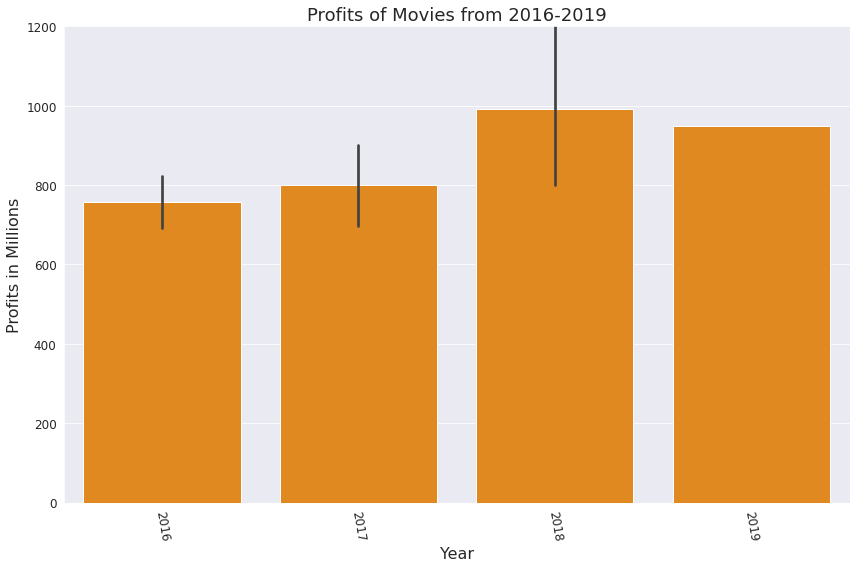

In [53]:
# plotting a bargraph for profits of movies in years 206-2019
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(data=df1_visualisation, x="year", y="profits", color='darkorange',)
plt.title('Profits of Movies from 2016-2019', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Year', fontsize=16)
plt.ylabel('Profits in Millions', fontsize=16)
plt.ylim(0, 1200)
#saved in images as fig10
plt.tight_layout()
plt.savefig('./images/fig10.png')

2018 movies generated the highest profits in the last 5 years. Avengers: Infinity War was the movie with the hihest profits in this year. It is of the Action/Sci-fi genre. This further confirms the trend of top grossing movies genres.

### Profits by the month of release.

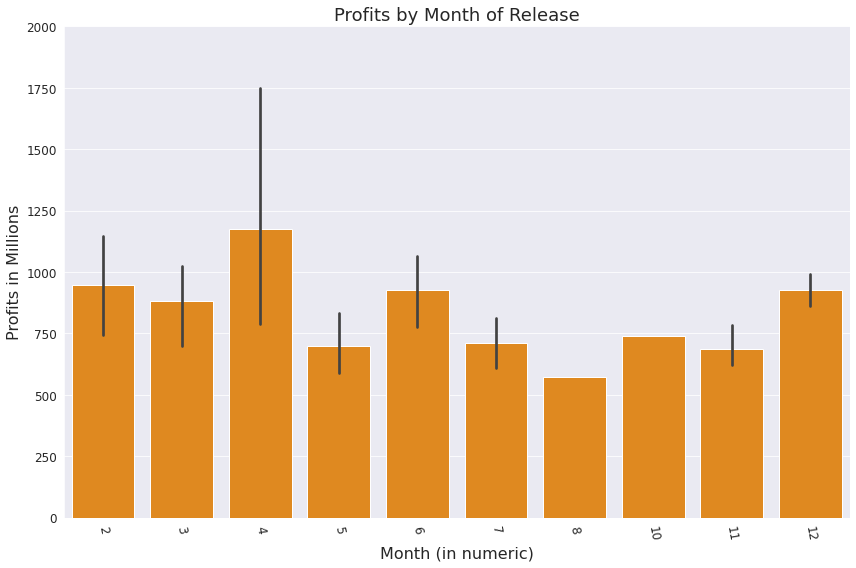

In [54]:
# plotting a bargraph for top grossing movies in 2016
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(data=df1_visualisation, x="month", y="profits", color='darkorange',)
plt.title('Profits by Month of Release', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Month (in numeric)', fontsize=16)
plt.ylabel('Profits in Millions', fontsize=16)
plt.ylim(0, 2000)
#saved in images as fig11
plt.tight_layout()
plt.savefig('./images/fig11.png')

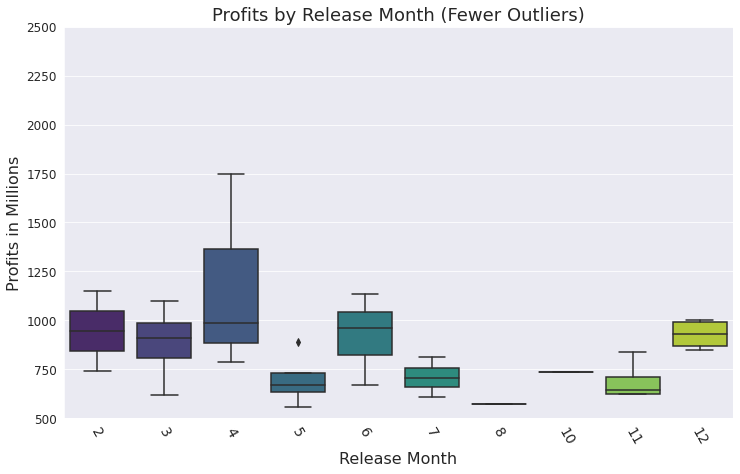

In [55]:
#Clear the outliers by plotting a boxplot
# generating bargraph plots of world gross by release month with fewer outliers
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.boxplot(x='month', y='profits', data=df1_visualisation, palette='viridis')
plt.xticks(rotation=-60)
plt.ylabel('Profits in Millions', fontsize=16)
plt.xlabel('Release Month', fontsize =16)
plt.title('Profits by Release Month (Fewer Outliers)', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(None, 2500);
#saved in images as fig12
plt.subplots_adjust(bottom=0.2)
plt.savefig('./images/fig12.png')

The best profits were recognized in the months on the first half of the year. The top months were April, February, June and December.This visualisation changes the dynamic of my previous analysis. April being the most profitable month to release a movie makes it more preferable than June.

December becomes easily a third choice by being the best month to release on the second half of the year and its profit margins too.

Through the whole analysis I,ve been able to meet the objectives I laid down a the begining of the project. It is now time to combine them into an actionable plan for Microsoft's upcoming movie studio. 

But before that I did a quick visualisation of the studios involved in the production of top grossing movies.


### What studios produced the top grossing movies?

In [56]:
#Check briefly the dtaframe I am working with
df2.head()

,title,studio,domestic_gross,foreign_gross,year
2322,Captain America: Civil War,BV,408100000.0,745200000,2016
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2324,Finding Dory,BV,486300000.0,542300000,2016
2325,Zootopia,BV,341300000.0,682500000,2016
2326,The Jungle Book (2016),BV,364000000.0,602500000,2016


In [57]:
#get a count of each mentioned studio and limit it to top ten.
studio = df2['studio'].value_counts().nlargest(10)
#make a list of the months and their respective counts
studio = ['Uni.', 'Sony', 'Fox','WB', 'BV', 'Par', 'LGF', 'Focus', 'STX', 'WB (NL)']
count = [47, 42, 41, 39, 31, 30, 30, 20, 20, 17]
#onvert the lists to a dataframe
studios = pd.DataFrame(list(zip(studio, count)),columns =['studio', 'count'])
studios

,studio,count
0,Uni.,47
1,Sony,42
2,Fox,41
3,WB,39
4,BV,31
5,Par,30
6,LGF,30
7,Focus,20
8,STX,20
9,WB (NL),17


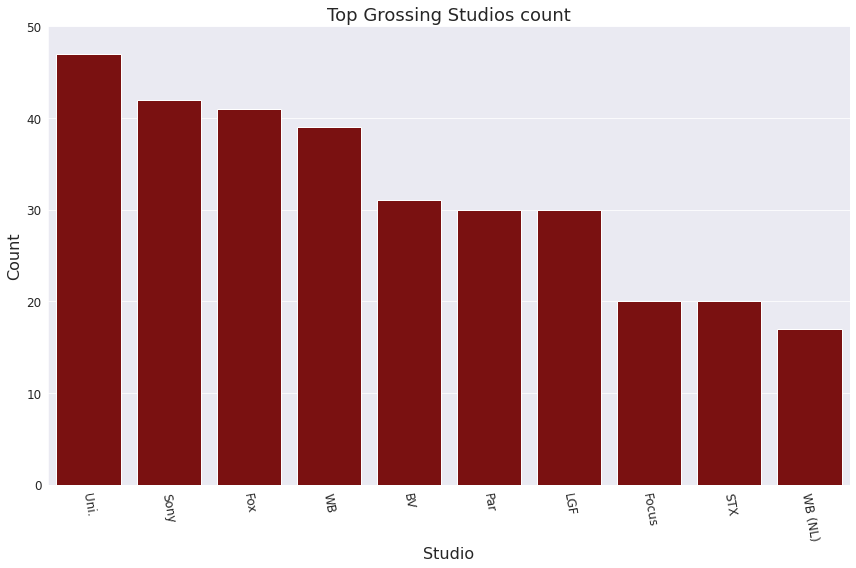

In [58]:
#create a visualisation of the above dataframe
# plotting a bargraph for top studio count for top grossing movies.
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(data=studios, x="studio", y="count", color='darkred',)
plt.title('Top Grossing Studios count', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Studio', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.ylim(0, 50)
#saved in images as fig13
plt.tight_layout()
plt.savefig('./images/fig13.png')

I have explained the above visualisation in the below evaluation. 

## Evaluation

Microsoft's entry into the worldwide box office industry can be attained by releasing a Action/Fiction movie in April or June. In addition by releasing an Animation, Adventure or Drama movie in April or December. My analysis and findings have shown that the more a studio invests in the production of a movies the higher the gross revenue they acquire easily getting bigger profits. Therefore Microsoft should be willing to break the bank to produce outstanding bx office movies. Though there are some outliers, the majority of high-grossing movies for these particular types of movies are ones with higher budgets. For Adventure, Drama or an Animated movie, the budget is best at between 55 and 200 million dollars. For a Action or Fiction movie, that amount is between 150 and 350 million dollars. Throughout my analysis, I have found that the best months to release a movie depends on the statisics collected on profits acquired. April came top followed by June and December. Moreover, I noted that the Action and Fiction movies were released mostly on April and JUne making them the top priority when considering release dates of these movies. I chose to investigate a bit further and narrow down some additional attributes that may increase a movie's value, I explored the studios involved in production of top grossing movies.  

Microsoft ought to consider collaborating with one of the top ten studios visualised in the cell above. Most importantly in one of their first production as way of learning the ropes. This serves as a benchmark on the big dogs in the movie production industry. 

I am optimistic that the results I inferred from this analysis would generalize beyond the data that I have, with the exception of 2020, 2021 together with this year too. By looking at the data up until 2019, the trends and correlations I found were true for the analysed years, so I am confident that they will again be true once similar steps are taken currently as the ones taken to achieve previous top grossing box office movies. 

I am confident that Microsoft will have a successful break into the movie-making industry by using my recommendations drawn from the above analysis in this project. From the data, it is clear that all the attributes I have discussed are correlated with high worldwide box office gross, which is exactly what Microsoft will want for their first movies and for the more to come in the future.

## Conclusion

In conclusion, I would recommend that Microsoft release one of the following three movies, each with four specific recommendations that have proven to be successful combinations:

### Movie Option 1
* An action sci-fi movie.
* with a production budget of 150 to 350 million dollars.
* released in April or June.
* Collaborate with WB or BV.

### Movie Option 2
* An animated movie
* With a production budget of 150 to 350 million dollars.
* Released in June or December.

### Movie Option 3
* A Drama movie
* With a production budget of 55 to 200 million dollars.
* Released in June or December.
* Collaborate with Sony or Uni.


While the past ten years of data show that this should be a good recipe for success, one limitation is the absence of recent data; this means 2020 and 2021 data. This may be because of the current world events(the COVID-19 pandemic and the war in europe).

In the future analysis it would be better to also do an analysis of streaming services and get more insights. This project can be as wide as one wants it to be but the objectives I set earlier have helped me come up with a short, thorough and insigtful analysis and visualisation.

The application of statstical methods and visualsations has made this project do-able. As they say; **statistics don't lie**. 